### Установка BigARTM

In [1]:
!apt-get --yes install git make cmake build-essential libboost-all-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
make is already the newest version (4.1-9.1ubuntu1).
make set to manually installed.
libboost-all-dev is already the newest version (1.65.1.0ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
git is already the newest version (1:2.17.1-1ubuntu0.5).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [2]:
!pip install protobuf tqdm wheel

In [3]:
!git clone --branch=stable https://github.com/bigartm/bigartm.git

Cloning into 'bigartm'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 16526 (delta 11), reused 16 (delta 5), pack-reused 16497
Receiving objects: 100% (16526/16526), 17.16 MiB | 8.40 MiB/s, done.
Resolving deltas: 100% (11554/11554), done.


In [4]:
cd bigartm

/content/bigartm


In [0]:
mkdir build

In [6]:
cd build

/content/bigartm/build


In [7]:
!cmake ..

-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Build type: Release
-- Looking for include file unistd.h
-- Looking for include file unistd.h - found
-- Boost version: 1.65.1
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Lookin

In [8]:
!make

Scanning dependencies of target libprotobuf
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arena.cc.o
[  0%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/arenastring.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/extension_set.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/generated_message_util.cc.o
[  1%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/coded_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/cmake/CMakeFiles/libprotobuf.dir/__/src/google/protobuf/io/zero_copy_stream_impl_lite.cc.o
[  2%] Building CXX object 3rdparty/protobuf-3.0.0/

In [9]:
!pip install python/bigartm*.whl -U

Processing ./python/bigartm-0.10.0-cp36-cp36m-linux_x86_64.whl


In [10]:
cd ../.. 

/content


In [11]:
!pip install pymorphy2[fast] nltk gensim

     |████████████████████████████████| 51kB 1.7MB/s 
     |████████████████████████████████| 7.1MB 8.2MB/s 
     |████████████████████████████████| 256kB 42.1MB/s 
  Created wheel for DAWG: filename=DAWG-0.7.8-cp36-cp36m-linux_x86_64.whl size=771538 sha256=043a339dc2977a8ba77bce18356d88d0d14a5930c94eb18d426446e193a21d46
  Stored in directory: /root/.cache/pip/wheels/d4/88/d0/4e4abc83eb8f59a71e8dbd8ba99fd5615a3af1fac1ef7f8825
Successfully built DAWG


In [12]:
import artm

import glob
import os, re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from nltk.corpus import stopwords
import numpy as np
from pymorphy2 import MorphAnalyzer
import gensim, nltk
import string

from nltk.tokenize import word_tokenize

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [13]:
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip

--2020-02-05 12:23:22--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/habr_texts.txt.zip
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip [following]
--2020-02-05 12:23:23--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/habr_texts.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18645068 (18M) [application/zip]
Saving to: ‘habr_texts.txt.zip’

habr_texts.txt.zip  100%[===================>]  17.78M  94.5MB/s    in 0.2s    

2020-02-05 12:23:27 (94.5 MB/s) - ‘habr_tex

In [14]:
!unzip habr_texts.txt.zip

Archive:  habr_texts.txt.zip
  inflating: habr_texts.txt          


In [0]:
with open('habr_texts.txt', encoding='utf-8') as file:
    source = file.read().splitlines()

1) сделайте нормализацию (если pymorphy2 работает долго используйте mystem или попробуйте установить быструю версию - `pip install pymorphy2[fast]`, можно использовать какой-то другой токенизатор) 

In [0]:
morph = MorphAnalyzer()

In [19]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

В статьях много кода, который начинает появляться в темах. Код никак не отделяется. Выделить только те слова, написанные латиницей, которые являются информативными, непропорционально трудозатратно, поэтому оставляю только кирилицу.

In [0]:
stop_words = set(stopwords.words('russian')) | {'gt',}

def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'{[^}]+}', ' ', text)
    text = re.sub(r'\&[a-z]+\;', ' ', text)
    text = text.replace('\t', ' ')
    return text

def tokenize(text):
    return re.findall(r'[А-Яа-яЁё]+', text)


def opt_normalize(texts, top=None):
    uniq = Counter()
    for text in texts:
        uniq.update(text)
    
    norm_uniq = {word:morph.parse(word)[0].normal_form for word, _ in uniq.most_common(top)}
    
    norm_texts = []
    for text in texts:
        
        norm_words = [norm_uniq.get(word) for word in text]
        norm_words = [word for word in norm_words if word and word not in stop_words]
        norm_texts.append(norm_words)
        
    return norm_texts

In [0]:
texts = opt_normalize([tokenize(clean_text(text)) for text in source])

2) добавьте нграммы (в тетрадке есть закомменченая ячейка с Phrases, можно также попробовать другие способы построить нграммы)

In [0]:
ph = gensim.models.Phrases(texts, scoring='npmi', min_count=8, threshold=0.3)
p = gensim.models.phrases.Phraser(ph)
ngrammed_texts = p[texts]

3) сохраните тексты .vw формате

In [0]:
def write_to_vw(path, texts):
  
  with open(path, 'w', encoding='utf-8') as file:
    for i, text in enumerate(texts):
      counter = Counter(text)
      document = f'doc_{i} '
      vw_text = ' '.join([f'{x}:{counter[x]}' for x in counter])
      file.write(f'{document}{vw_text}'+'\n')

In [0]:
write_to_vw('habr_texts.vw', ngrammed_texts)

In [25]:
!head -n 1 habr_texts.vw

doc_0 это:5 библиотека:7 разработать:1 язык:1 платформа:1 упрощать:1 работа:5 шина:1 дать:1 который:15 использоваться:2 построение:1 распределенный:1 приложение:1 реализация:4 качество:4 мочь:3 выступать:1 менеджер:1 случай:6 область_видимость:1 ограничиваться:1 процесс:2 проинициализировать:1 экземпляр:1 содержание:1 команда:20 событиякоманда:1 событие:19 контракт:6 сообщение:32 роутинг:2 формат:3 консьюмер:12 конфигурация:6 контейнер:4 наблюдатель:3 новое:2 заключение:2 опрос:1 использовать:5 заложить:2 основный:2 тип:11 сигнализировать:2 необходимость:1 выполнить:2 некий:2 действие:3 наиболее:1 содержательный:1 наименование:5 желательно:1 структура:2 глагол:1 существительное:1 осуществляться_помощь:2 метод:8 интерфейс:7 указание:3 получатель:1 очередь:5 отправка:4 случиться:2 интересно:1 набор:2 подписчик:2 паттерн:1 реагировать:2 например:1 терминология:1 различие:1 доставляться:1 единственный:1 исполнитель:1 даба:1 избежать:1 дублирование:1 выполнение:2 изображение:3 статья:3 врем

4) сделайте хороший словарь (отфильтруйте слишком частотные и редкие слова, попробуйте удалить стоп-слова, сохраните словарь и посмотрите на него, вдруг что-то плохое сразу будет заметно – из словаря можно просто вручную или правилом удалять строки, при загрузке ничего не сломается)

In [0]:
batch_vectorizer = artm.BatchVectorizer(data_path='habr_texts.vw',  # название файла
                                        data_format='vowpal_wabbit', # формат файла, у нас vw
                                        target_folder='batches', # название папки в которую положаться батчи
                                       batch_size=1000) # размер батча, подбирайте под свою память

In [0]:
# batch_vectorizer = artm.BatchVectorizer(data_path='batches', # название папки с батчами
#                                         data_format='batches') # указываем формат - батчи

In [0]:
dictionary = artm.Dictionary()

In [29]:
dictionary.gather(data_path='batches')
dictionary.filter(class_id='@default_class',
                  min_df=10, max_df=2000) # фильтруем слишком редкие и слишком частые нграммы

artm.Dictionary(name=4fdca4b0-7545-46f8-b9bd-364f0705593b, num_entries=16001)

In [0]:
dictionary.save_text('dict.txt')
# dictionary = artm.Dictionary()
# dictionary.load_text('dict.txt')

In [31]:
!head -n 20 dict.txt

name: 4fdca4b0-7545-46f8-b9bd-364f0705593b num_items: 4121
token, class_id, token_value, token_tf, token_df
употребить, @default_class, 3.6125613860349404e-06, 10.0, 10.0
бесплатный_билет, @default_class, 5.0575858949741814e-06, 14.0, 11.0
участие_бесплатный, @default_class, 4.335073754191399e-06, 12.0, 12.0
понижение, @default_class, 9.031403351400513e-06, 25.0, 23.0
индивидуальный_особенность, @default_class, 3.973817456426332e-06, 11.0, 11.0
цепочка, @default_class, 0.00010801558528328314, 299.0, 201.0
затухание, @default_class, 1.2282708667044062e-05, 34.0, 24.0
аполлон, @default_class, 6.141354333522031e-06, 17.0, 12.0
носить_устройство, @default_class, 1.1921452824026346e-05, 33.0, 17.0
веселие, @default_class, 6.502610631287098e-06, 18.0, 17.0
второстепенный, @default_class, 1.3005221262574196e-05, 36.0, 29.0
отдавать_предпочтение, @default_class, 1.047642854246078e-05, 29.0, 27.0
критик, @default_class, 9.392660103912931e-06, 26.0, 19.0
боевик, @default_class, 4.335073754191399

Целесообразно убрать слова, длина которых меньше одного или двух символов.

In [0]:
!grep "^..," -v dict.txt | grep "^.," -v > "habr_filtered.txt"

In [33]:
!head -n 20 habr_filtered.txt

name: 4fdca4b0-7545-46f8-b9bd-364f0705593b num_items: 4121
token, class_id, token_value, token_tf, token_df
употребить, @default_class, 3.6125613860349404e-06, 10.0, 10.0
бесплатный_билет, @default_class, 5.0575858949741814e-06, 14.0, 11.0
участие_бесплатный, @default_class, 4.335073754191399e-06, 12.0, 12.0
понижение, @default_class, 9.031403351400513e-06, 25.0, 23.0
индивидуальный_особенность, @default_class, 3.973817456426332e-06, 11.0, 11.0
цепочка, @default_class, 0.00010801558528328314, 299.0, 201.0
затухание, @default_class, 1.2282708667044062e-05, 34.0, 24.0
аполлон, @default_class, 6.141354333522031e-06, 17.0, 12.0
носить_устройство, @default_class, 1.1921452824026346e-05, 33.0, 17.0
веселие, @default_class, 6.502610631287098e-06, 18.0, 17.0
второстепенный, @default_class, 1.3005221262574196e-05, 36.0, 29.0
отдавать_предпочтение, @default_class, 1.047642854246078e-05, 29.0, 27.0
критик, @default_class, 9.392660103912931e-06, 26.0, 19.0
боевик, @default_class, 4.335073754191399

```token, class_id, token_value, token_tf, token_df``` <br>
Используя структуру данных выше, можно отсортировать словарь.

In [34]:
!tail -n +3 "habr_filtered.txt" | sort -t$' ' -k5 -nr | head -n 30

очень, @default_class, 0.0019088775152340531, 5284.0, 1987.0
случай, @default_class, 0.0018514377297833562, 5125.0, 1965.0
поэтому, @default_class, 0.001686704927124083, 4669.0, 1965.0
некоторый, @default_class, 0.0015114956768229604, 4184.0, 1953.0
результат, @default_class, 0.0019489768892526627, 5395.0, 1936.0
использование, @default_class, 0.0017614850075915456, 4876.0, 1886.0
являться, @default_class, 0.001636129105463624, 4529.0, 1877.0
проблема, @default_class, 0.0018687780248001218, 5173.0, 1874.0
простой, @default_class, 0.0014146791072562337, 3916.0, 1859.0
человек, @default_class, 0.0029814469162374735, 8253.0, 1849.0
позволять, @default_class, 0.0015143858036026359, 4192.0, 1846.0
пример, @default_class, 0.001831929897889495, 5071.0, 1839.0
следующий, @default_class, 0.0014009512960910797, 3878.0, 1831.0
компания, @default_class, 0.0030164888594299555, 8350.0, 1771.0
необходимый, @default_class, 0.0015971134416759014, 4421.0, 1746.0
проект, @default_class, 0.002820326713845

In [0]:
!printf "далее\nчасть\nследующий\nнеобходимый\nстать\nпоэтому\nещё\nиметь\nявляться\nнекоторый\nразный\nпример\nнесколько\nлюбой\nименно\n" > "stopwords.txt"

Данные слова кажутся не очень информативными. Отфильтруем их.

In [0]:
!grep -v -w -f "stopwords.txt" "habr_filtered.txt" > "tmp.txt"

In [0]:
!cat "tmp.txt" > "habr_filtered.txt"

Здесь все слова кажутся информативными.

In [38]:
!tail -n +3 "habr_filtered.txt" | sort -t$' ' -k4 -nr | head -n 20

компания, @default_class, 0.0030164888594299555, 8350.0, 1771.0
человек, @default_class, 0.0029814469162374735, 8253.0, 1849.0
проект, @default_class, 0.0028203267138451338, 7807.0, 1740.0
пользователь, @default_class, 0.002717007417231798, 7521.0, 1727.0
код, @default_class, 0.0025645573623478413, 7099.0, 1482.0
приложение, @default_class, 0.002271217294037342, 6287.0, 1335.0
функция, @default_class, 0.002081196755170822, 5761.0, 1317.0
результат, @default_class, 0.0019489768892526627, 5395.0, 1936.0
файл, @default_class, 0.0019417518051341176, 5375.0, 1087.0
очень, @default_class, 0.0019088775152340531, 5284.0, 1987.0
игра, @default_class, 0.0019045424414798617, 5272.0, 585.0
проблема, @default_class, 0.0018687780248001218, 5173.0, 1874.0
случай, @default_class, 0.0018514377297833562, 5125.0, 1965.0
задача, @default_class, 0.0018301235977560282, 5066.0, 1562.0
использование, @default_class, 0.0017614850075915456, 4876.0, 1886.0
устройство, @default_class, 0.001751369796693325, 4848.0

Здесь тоже ничего вопросов не вызывает.

In [39]:
!tail -n +3 "habr_filtered.txt" | sort -t$' ' -k4 -nr | tail -n 20

вдаваться_деталь, @default_class, 3.6125613860349404e-06, 10.0, 10.0
варить, @default_class, 3.6125613860349404e-06, 10.0, 10.0
валяться, @default_class, 3.6125613860349404e-06, 10.0, 10.0
бурный_рост, @default_class, 3.6125613860349404e-06, 10.0, 10.0
близиться, @default_class, 3.6125613860349404e-06, 10.0, 10.0
ближний_перспектива, @default_class, 3.6125613860349404e-06, 10.0, 10.0
библиотечка, @default_class, 3.6125613860349404e-06, 10.0, 10.0
безоговорочно, @default_class, 3.6125613860349404e-06, 10.0, 10.0
безболезненный, @default_class, 3.6125613860349404e-06, 10.0, 10.0
бедствие, @default_class, 3.6125613860349404e-06, 10.0, 10.0
бдительный, @default_class, 3.6125613860349404e-06, 10.0, 10.0
банкир, @default_class, 3.6125613860349404e-06, 10.0, 10.0
аудиокнига, @default_class, 3.6125613860349404e-06, 10.0, 10.0
англоязычный_ресурс, @default_class, 3.6125613860349404e-06, 10.0, 10.0
аналитик_маркетинг, @default_class, 3.6125613860349404e-06, 10.0, 10.0
аляска, @default_class, 3.6

Обновим словарь.

In [0]:
dictionary = artm.Dictionary()
dictionary.load_text('habr_filtered.txt')

5) постройте несколько ARTM моделей (переберите количество тем, поменяйте значения tau у регуляризаторов), если получаются плохие темы, поработайте дополнительно над предобработкой и словарем

In [0]:
def print_measures(model_artm):
    print('Sparsity Phi: {0:.3f} ARTM)'.format(
        model_artm.score_tracker['SparsityPhiScore'].last_value)
)
    print('Sparsity Theta: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['SparsityThetaScore'].last_value))

    print('Kernel contrast: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_contrast))

    print('Kernel purity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['TopicKernelScore'].last_average_purity))

    print('Perplexity: {0:.3f} (ARTM)'.format(
        model_artm.score_tracker['PerplexityScore'].last_value)
)
    plt.plot(range(model_artm.num_phi_updates), model_artm.score_tracker['PerplexityScore'].value, 'r--', linewidth=2)
    plt.xlabel('Iterations count')
    plt.ylabel(' ARTM perp. (red)')
    plt.grid(True)
    plt.show()

In [0]:
def init_model(n_topics, tau_1, tau_2):
  model_artm = artm.ARTM(topic_names=[f'topic_{i}' for i in range(n_topics)],
                       
                       regularizers=[
                           artm.DecorrelatorPhiRegularizer(
                                            name='Decorr', tau=tau_1, 
                                            class_ids=['@default_class'],
                                            topic_names=[f'topic_{i}' for i in range(n_topics)]),
                           
                           artm.SmoothSparsePhiRegularizer(
                                            name='SmoothPhi_1', 
                                            class_ids=['@default_class'],
                                            tau=tau_2, 
                                            topic_names=[f'topic_{i}' for i in range(n_topics)])
                                    ]
                        )
  model_artm.scores.add(artm.PerplexityScore(name='PerplexityScore',
                                                    dictionary=dictionary))
  model_artm.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore')) # разреженность слов в темах
  model_artm.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore')) # разреженность тем в доках
  model_artm.scores.add(artm.TopicKernelScore(name='TopicKernelScore', probability_mass_threshold=0.1)) # когерентность по семантичесим ядрам
  model_artm.scores.add(artm.TopTokensScore(class_id='@default_class', name='TopTokensScore_1', num_tokens=10)) # топ-n-слов для каждой темы 
  
  model_artm.initialize(dictionary=dictionary, )
  
  return model_artm


In [0]:
def view_topics(model, n):
  for topic in model.topic_names[:n]:
    print(f'{topic}:')
    try:
      for x in model.score_tracker['TopTokensScore_1'].last_tokens[topic]:
        print(x)
      print('---------')
    except KeyError:
      continue

Sparsity Phi: 0.864 ARTM)
Sparsity Theta: 0.826 (ARTM)
Kernel contrast: 0.215 (ARTM)
Kernel purity: 0.260 (ARTM)
Perplexity: 315.580 (ARTM)


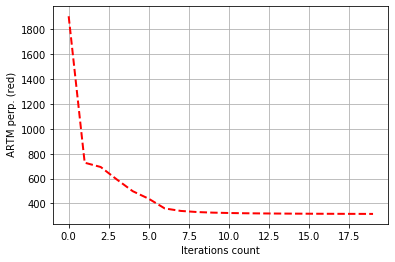

In [44]:
n_topics = 200
model_1 = init_model(n_topics, 0.25, 0.15)
model_1.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=5)
model_1.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=[f'topic_{i}' for i in range(1, n_topics)],
                                                            ))
model_1.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=[f'topic_{i}' for i in range(1, n_topics)]))
phi_tau = model_1.regularizers['SparsePhi'].tau
theta_tau = model_1.regularizers['SparseTheta'].tau

for i in range(15):
    model_1.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.35))
    model_1.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.2))
    
    model_1.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=1)

print_measures(model_1)

На мой взгляд, с этими параметрами (почти без изменений) получаются очень приличные результаты по сравнению с LDA. Темы достаточно четко отделяются друг от друга.

In [45]:
view_topics(model_1, 20)

topic_0:
учёный
бактерия
днк
сердце
заболевание
исследование
рак
человек
организм
клетка
---------
topic_1:
ноутбук
планшет
монета
стекло
клавиатура
экран
дюймовый
девайс
процессор
аккумулятор
---------
topic_2:
человек
лицо
фотография
оценка
результат
информация
гражданин
рейтинг
нейросеть
преступник
---------
topic_3:
участник
конкурс
победитель
мероприятие
участие
участвовать
голосование
приз
портал
организатор
---------
topic_4:
процессор
регистр
инструкция
память
архитектура
байт
битный
ассемблер
компилятор
использоваться
---------
topic_5:
регистратор
модель
видео
аппарат
китайский
запись
случай
видеорегистратор
устройство
качество
---------
topic_6:
сертификат
подпись
ключ
открытый_ключ
закрытый_ключ
документ
контроллер
функция
использоваться
публичный_ключ
---------
topic_7:
сервер
восстановление
кластер
диск
мониторинг
кэш
метрика
база
резервный_копирование
нагрузка
---------
topic_8:
доклад
конференция
разработчик
рассказать
спикер
тема
выступление
мероприятие
проект
встреча


Sparsity Phi: 0.797 ARTM)
Sparsity Theta: 0.537 (ARTM)
Kernel contrast: 0.264 (ARTM)
Kernel purity: 0.481 (ARTM)
Perplexity: 420.389 (ARTM)


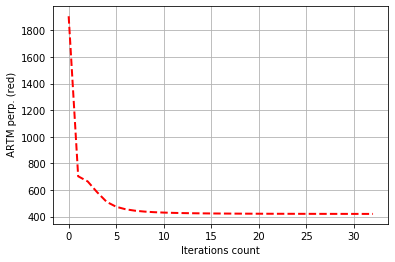

In [46]:
n_topics = 50
model_2 = init_model(n_topics, 0.1, 0.05)
model_2.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=3)
model_2.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=[f'topic_{i}' for i in range(1, n_topics)],
                                                            ))
model_2.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=[f'topic_{i}' for i in range(1, n_topics)]))
phi_tau = model_2.regularizers['SparsePhi'].tau
theta_tau = model_2.regularizers['SparseTheta'].tau

for i in range(30):
    model_2.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.25))
    model_2.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.1))
    
    model_2.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=1)

print_measures(model_2)

In [47]:
view_topics(model_2, 20)

topic_0:
человек
учёный
клетка
животное
болезнь
ген
заболевание
организм
бактерия
случай
---------
topic_1:
безопасность
атака
устройство
защита
уязвимость
информация
злоумышленник
пользователь
компания
шифрование
---------
topic_2:
человек
книга
жизнь
слово
дело
читать
сказать
мысль
имя
автор
---------
topic_3:
номер
оператор
карта
канал
звонок
участник
связь
событие
вызов
интернет
---------
topic_4:
память
процессор
ядро
производительность
поток
результат
инструкция
регистр
оптимизация
архитектура
---------
topic_5:
камера
робот
видео
устройство
регистратор
модель
аппарат
съёмка
качество
дрон
---------
topic_6:
модуль
драйвер
сертификат
функция
пакет
файл
ядро
контроллер
код
добавить
---------
topic_7:
сервер
запрос
сервис
база_дать
клиент
проблема
база
очередь
ответ
процесс
---------
topic_8:
доклад
конференция
участник
тема
курс
мероприятие
лекция
рассказать
интересный
разработчик
---------
topic_9:
машина
метр
автомобиль
компьютер
город
человек
плата
создать
технология
создание
--

Sparsity Phi: 0.000 ARTM)
Sparsity Theta: 0.000 (ARTM)
Kernel contrast: 0.234 (ARTM)
Kernel purity: 0.514 (ARTM)
Perplexity: 469.673 (ARTM)


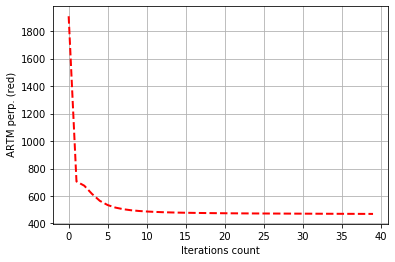

In [48]:
n_topics = 25
model_3 = init_model(n_topics, 0.5, 0.2)
model_3.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=40)

print_measures(model_3)

In [49]:
view_topics(model_3, 20)

topic_0:
человек
учёный
пациент
исследование
мозг
клетка
результат
врач
случай
животное
---------
topic_1:
устройство
камера
смартфон
модель
телефон
видео
производитель
экран
ноутбук
цена
---------
topic_2:
человек
ваш
книга
слово
жизнь
говорить
результат
вопрос
информация
важный
---------
topic_3:
карта
номер
канал
событие
клиент
оператор
звонок
значение
вызов
телефон
---------
topic_4:
память
процессор
ядро
программа
вселенная
результат
поток
скорость
производительность
цикл
---------
topic_5:
материал
объект
свет
глаз
поверхность
точка
движение
вода
здание
форма
---------
topic_6:
файл
модуль
функция
код
ключ
строка
язык
символ
документ
текст
---------
topic_7:
запрос
сервер
тест
запись
база_дать
таблица
сервис
пользователь
клиент
ответ
---------
topic_8:
доклад
конференция
проект
курс
тема
разработчик
участник
разработка
интересный
программист
---------
topic_9:
робот
компьютер
программа
машина
технология
человек
автомобиль
ребёнок
создание
создать
---------
topic_10:
компания
стра

6) для самой хорошей модели в отдельной ячейке напечатайте 3 хороших (на ваш вкус) темы

Темы выделились на удивление хорошо. В принципе, здесь можно достаточно легко определить к чему они относятся: *кибербезопасность, devops, машинное обучение*:
```
---------
topic_35: 
пароль
флаг
получать
найти
файл
находить
вход
ввести
утечка
воспользоваться
---------
topic_41: 
виртуальный
хранилище
хранение
виртуальный_машина
инфраструктура
хост
уровень
диск
виртуализация
схд
---------
topic_46: 
обучение
признак
сеть
машинный_обучение
нейронный_сеть
обучать
распознавание
информация
алгоритм
классификация
---------
```

7) в другой ячейке нарисуйте график обучения этой модели 

Sparsity Phi: 0.864 ARTM)
Sparsity Theta: 0.826 (ARTM)
Kernel contrast: 0.215 (ARTM)
Kernel purity: 0.260 (ARTM)
Perplexity: 315.580 (ARTM)


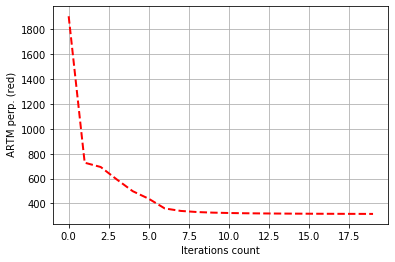

In [50]:
n_topics = 200
model_1 = init_model(n_topics, 0.25, 0.15)
model_1.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=5)
model_1.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=[f'topic_{i}' for i in range(1, n_topics)],
                                                            ))
model_1.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=[f'topic_{i}' for i in range(1, n_topics)]))
phi_tau = model_1.regularizers['SparsePhi'].tau
theta_tau = model_1.regularizers['SparseTheta'].tau

for i in range(15):
    model_1.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.35))
    model_1.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.2))
    
    model_1.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=1)

print_measures(model_1)

8) в третьей ячейке опишите какие параметры (количество тем, регуляризаторы, их tau) вы использовали и как обучали (например, после скольки проходов добавили регуляризатор разрежнивания тем (Phi), добавляли ли разреженность документам (Theta) и когда, как повышали значения, сколько итерации модель продожала улучшаться (снижалась перплексия, росли другие метрики)

Надо сказать, что степень влияния параметров на субъективное восприятие качества тем достаточно сложно оценить, т.к. для всех трех построенных моделей получились вполне вменяемые темы. <br>
Пробовал менять количество тем от 200 до 20. Похоже, что темы становятся менее конкретными, т.е. начинают покрывать (как кажется) большее количество документов, чем в моделях, настроенных на большее количество тем.
Видим, что использование регуляризаторов приводит к тому, что модель сходится за меньшее число итераций. Более быстрый рост значений фи и тау у регуляризаторов также имеет схожий эффект.
В рассмотренной модели перплексность начинает выходить на плато после 10 итераций.

Sparsity Phi: 0.656 ARTM)
Sparsity Theta: 0.789 (ARTM)
Kernel contrast: 0.183 (ARTM)
Kernel purity: 0.149 (ARTM)
Perplexity: 437.477 (ARTM)


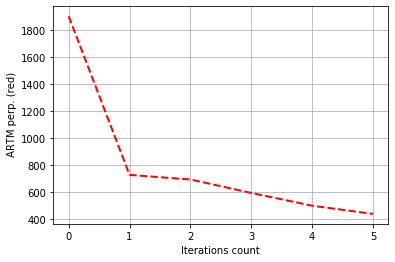

Sparsity Phi: 0.841 ARTM)
Sparsity Theta: 0.829 (ARTM)
Kernel contrast: 0.208 (ARTM)
Kernel purity: 0.229 (ARTM)
Perplexity: 322.915 (ARTM)


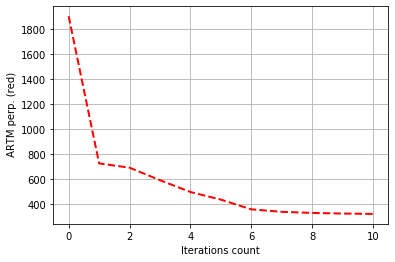

Sparsity Phi: 0.858 ARTM)
Sparsity Theta: 0.828 (ARTM)
Kernel contrast: 0.213 (ARTM)
Kernel purity: 0.248 (ARTM)
Perplexity: 317.160 (ARTM)


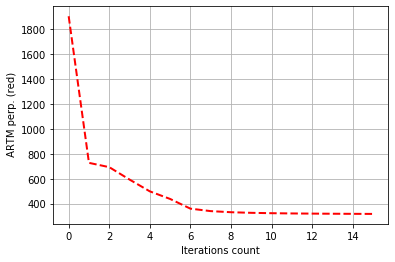

In [51]:
n_topics = 200
model_1 = init_model(n_topics, 0.25, 0.15)
model_1.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=5)
model_1.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.15, 
                                                            topic_names=[f'topic_{i}' for i in range(1, n_topics)],
                                                            ))
model_1.regularizers.add(artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.15, 
                                                              topic_names=[f'topic_{i}' for i in range(1, n_topics)]))
phi_tau = model_1.regularizers['SparsePhi'].tau
theta_tau = model_1.regularizers['SparseTheta'].tau

for i in range(15):
    model_1.regularizers['SparsePhi'].tau = (phi_tau + (phi_tau*0.35))
    model_1.regularizers['SparseTheta'].tau = (theta_tau + (theta_tau*0.2))
    
    model_1.fit_offline(batch_vectorizer=batch_vectorizer, num_collection_passes=1)
    if not i % 5:
      print_measures(model_1)

